In [1]:
from sigvisa.synthetic.doublets import *










In [2]:
# TODO: load param models for run 28, so I can pass them in to joint_sample_arrival_params below

tmtypes = {'tt_residual': 'constant_laplacian',
                   'peak_offset': 'param_linear_mb',
                   'coda_decay': 'param_linear_distmb',
                   'peak_decay': 'param_linear_distmb',
                   'amp_transfer': 'param_sin1'}

In [3]:
basedir = os.path.join(os.getenv("SIGVISA_HOME"), "experiments", "synth_wavematch")
seed=12
n_evs = 5
lons = [129, 130]
lats = [-3.5, -4.5]
times = [1240240000, 1240340000]
mbs = [4.0, 5.0]
sw = SampledWorld(seed=seed)
sw.sample_region_with_doublet(n_evs, lons, lats, times, mbs)
sw.stas = ["MK31", "AS12", "CM16", "FITZ", "WR1"]
param_means = build_param_means(sw.stas)
sw.set_basis(wavelet_family="db4uvars_2.0_3_10_0.4", srate=5.0)
gpcov = GPCov([1.0,], [ 40.0, 5.0],
              dfn_str="lld",
              wfn_str="se")
pmodels = sw.load_param_models((28,))
sw.joint_sample_arrival_params(gpcov, param_means, param_models=pmodels)

sw.sample_signals("freq_0.8_4.5")
wave_dir = os.path.join(basedir, "sampled_%d" % seed)
sw.serialize(wave_dir)

sampled true coefs at MK31
sampled true coefs at AS12
sampled true coefs at CM16
sampled true coefs at FITZ
sampled true coefs at WR1
sampling w/ seed 662124363
sampling w/ seed 1916507803
sampling w/ seed 1031005574
sampling w/ seed 1603685629
sampling w/ seed 1130929393
sampling w/ seed 371232386
sampling w/ seed 144909571
sampling w/ seed 960362435
sampling w/ seed 62598988
sampling w/ seed 1505292720
sampling w/ seed 1798504726
sampling w/ seed 145874993
sampling w/ seed 1721057204
sampling w/ seed 1268891525
sampling w/ seed 143543949
sampling w/ seed 354439641
sampling w/ seed 1962582434
sampling w/ seed 970465739
sampling w/ seed 589309558
sampling w/ seed 1601311818
sampling w/ seed 1219033472
sampling w/ seed 755903861
sampling w/ seed 455623784
sampling w/ seed 2077248716
sampling w/ seed 1907932429
sampling w/ seed 2068156498
sampling w/ seed 1514987609
sampling w/ seed 1771840803
sampling w/ seed 9703358
sampling w/ seed 815512676


In [3]:

import os
basedir = os.path.join(os.getenv("SIGVISA_HOME"), "experiments", "synth_wavematch")
wave_dir = os.path.join(basedir, "sampled_%d" % 12)
sw = load_sampled_world(wave_dir)


In [4]:
print sw.wavelet_family

db4uvars_2.0_3_10.0_0.4


In [5]:
sg, wns = build_joint_sg(sw, 28, wiggle_model_type="gp_joint", template_model_type=tmtypes)


Exception: adding new wave at MK31,BHZ,freq_0.8_4.5 from time 1240268928.2-1240269328.2 potentially conflicts with existing wave from 1240266877.2-1240267277.2

In [5]:
# TODO: use real template models from run 28
# TODO: add code to build_sg to set the true events and templates. 
print sg.current_log_p()


-28137.3155702


In [ ]:

from sigvisa.infer.run_mcmc import run_open_world_MH
from sigvisa.infer.mcmc_logger import MCMCLogger


#ev_init = sg.get_event(1)
np.random.seed(0)
logger = MCMCLogger( write_template_vals=True, dump_interval=10, print_interval=10, write_gp_hparams=True)

with open(os.path.join(logger.run_dir, "events.pkl"), "wb") as f:
    pickle.dump([sw.ev_doublet,], f)
    
with open(os.path.join(logger.run_dir, "train_events.pkl"), "wb") as f:
    pickle.dump(sw.evs, f)
    
run_open_world_MH(sg, steps=5000,
                  enable_event_openworld=False,
                  enable_event_moves=False,
                  enable_template_openworld=False,
                  enable_template_moves=False,
                  logger=logger)


check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
alldiffs -3.98081832101
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
alldiffs -7.20712492997
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
alldiffs -17.520618823
check passed!
check passed!
alldiffs -19.8333015905
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
alldiffs -22.7746381609
check passed!
check passed!
check passed!
check passed!
alldiffs -19.9080412319
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
check passed!
che

In [9]:
print sg.dummy_prior

<function dummyPriorModel at 0x52b3aa0>


In [3]:
A = np.loadtxt("/home/dmoore/python/sigvisa/logs/mcmc/01826/gp_hparams/CM16_depth_lscale")

In [11]:
print np.mean(A)


24.5716674008
20.0855369232


In [18]:
import os
mcmc_dir = "/home/dmoore/python/sigvisa/logs/mcmc/01829/"
d = os.path.join(mcmc_dir, "gp_hparams")
for fname in sorted(os.listdir(d)):
    vs = fname.split("_")
    sta = vs[0]
    hparam = "_".join(vs[1:])
    ffname = os.path.join(d, fname)
    print sta, hparam, ffname
    a = np.loadtxt(ffname)[200:, :]
    print " means:", " ".join(['%.3f' % m for m in np.mean(a, axis=0)])
    print " stds:", " ".join(['%.3f' % m for m in np.std(a, axis=0)])

AS12 depth_lscale /home/dmoore/python/sigvisa/logs/mcmc/01829/gp_hparams/AS12_depth_lscale
 means: 35.339 55.996 20.030 29.491 30.498 23.537 37.788 21.086 29.922 34.513 33.249 30.418 24.952 34.691 26.344 39.862 32.475 29.042 22.961 32.725 28.070 33.948 38.256 26.877 27.958 25.861
 stds: 32.637 63.743 15.186 31.227 36.379 20.166 38.604 19.702 31.674 36.467 28.640 25.719 20.610 33.953 24.215 37.913 30.166 25.243 18.373 31.855 24.036 35.762 31.822 22.854 24.139 22.394
AS12 horiz_lscale /home/dmoore/python/sigvisa/logs/mcmc/01829/gp_hparams/AS12_horiz_lscale
 means: 31.213 40.199 227.136 116.534 46.253 118.249 153.713 117.287 41.887 46.980 47.266 55.354 23.664 53.068 105.742 114.600 46.177 41.889 226.802 23.452 24.134 67.346 25.292 66.772 60.484 133.863
 stds: 31.153 33.002 99.810 38.237 43.946 98.624 65.262 79.381 35.942 42.939 37.409 38.935 18.719 51.661 73.902 62.936 39.598 31.686 152.299 19.092 20.574 52.857 19.917 62.210 43.669 91.728
AS12 noise_var /home/dmoore/python/sigvisa/logs/mc

ValueError: setting an array element with a sequence.

In [4]:
import cPickle  as pickle
with open("/home/dmoore/python/sigvisa/logs/mcmc/01829/step_000059/pickle.sg", 'rb') as f:
    sg = pickle.load(f)

In [5]:
print sg.evnodes.keys()

[1, 2, 3, 4, 5, 6]


reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 

/home/dmoore/python/sigvisa/plotting/plot.py:260: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  all_det_labels = [Sigvisa().phasenames[arrivals[i, DET_PHASE_COL]] for i in range(arrivals.shape[0])]
/home/dmoore/python/sigvisa/plotting/plot.py:260: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  all_det_labels = [Sigvisa().phasenames[arrivals[i, DET_PHASE_COL]] for i in range(arrivals.shape[0])]
/home/dmoore/python/sigvisa/plotting/plot.py:260: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  all_det_labels = [Sigvisa().phasenames[arrivals[i, DET_PHASE_COL]] for i in range(arrivals.shape[0])]



reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 
reading station detections... 


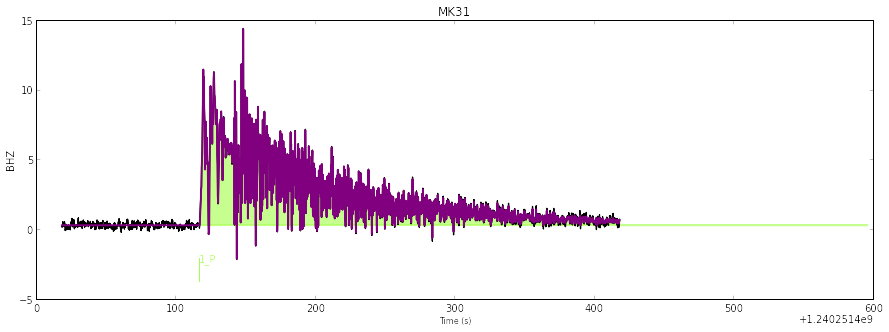

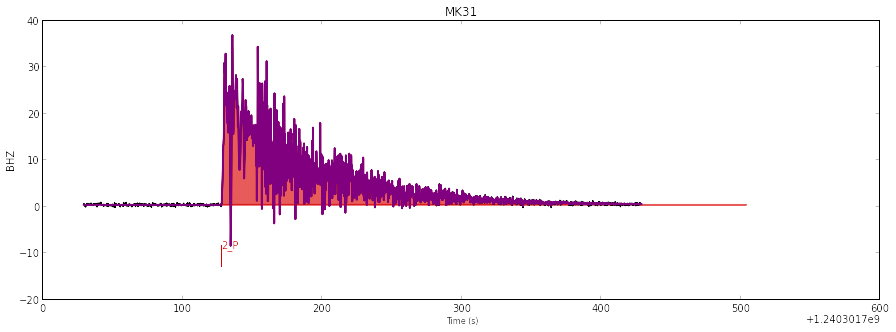

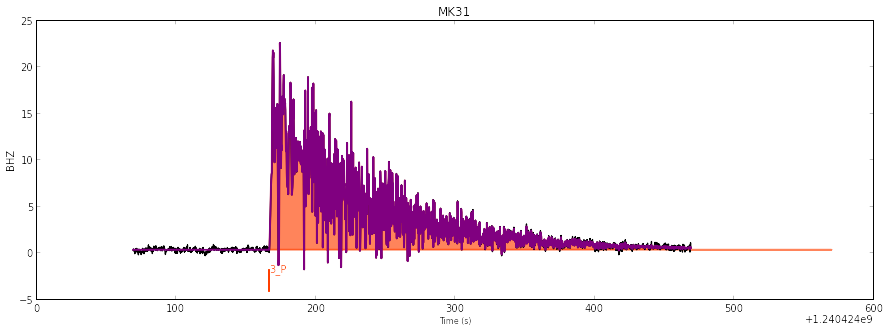

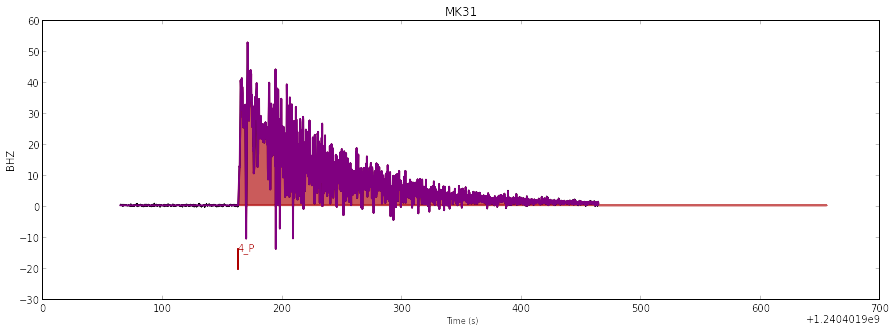

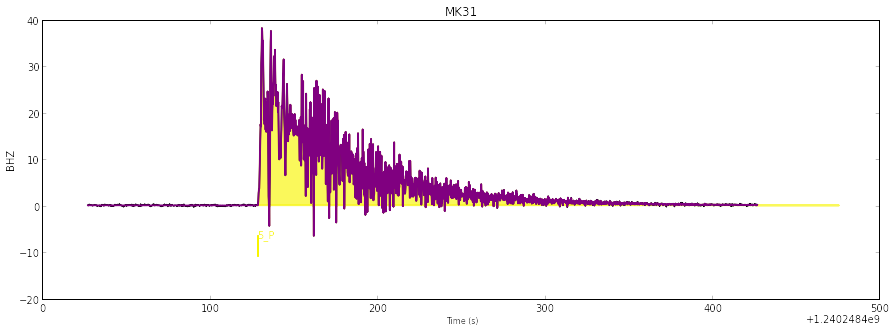

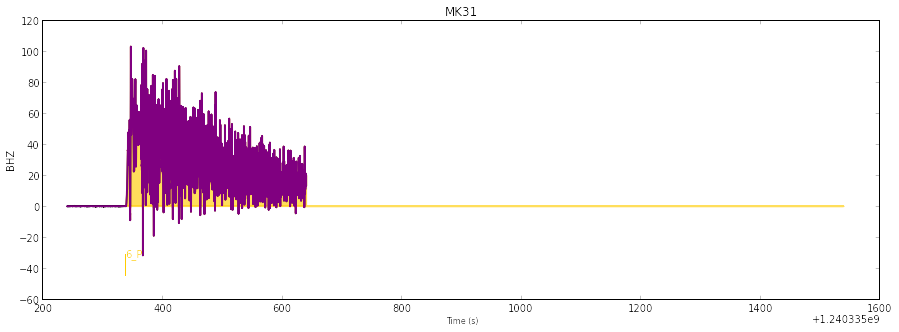

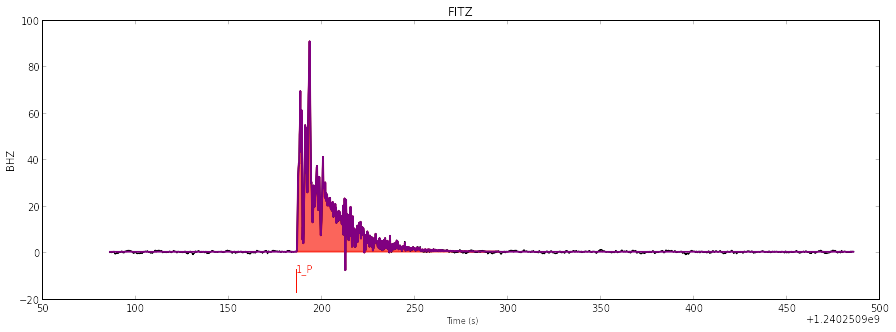

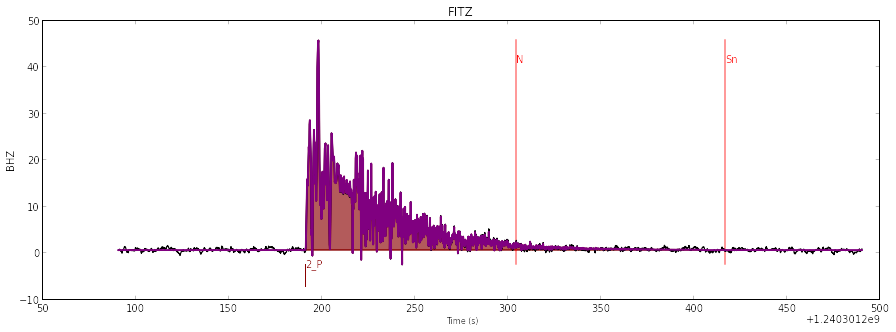

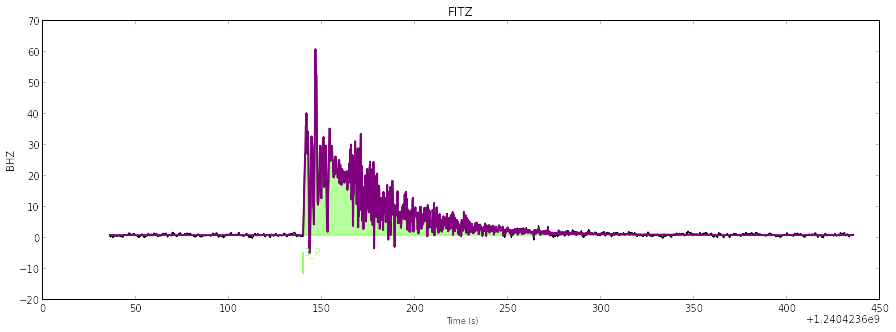

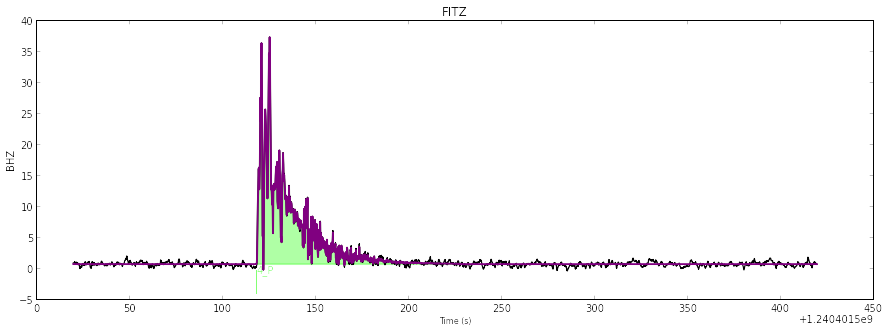

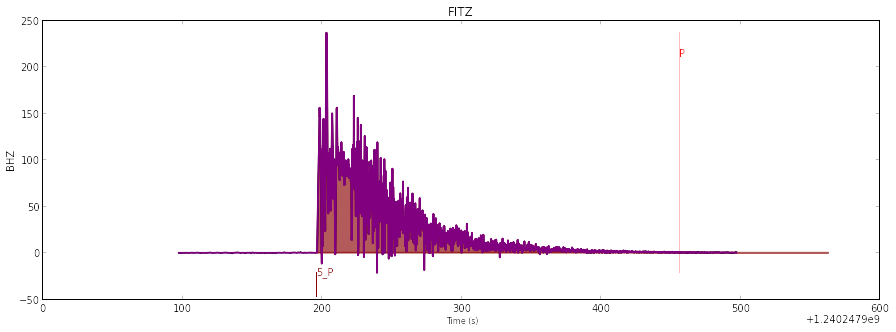

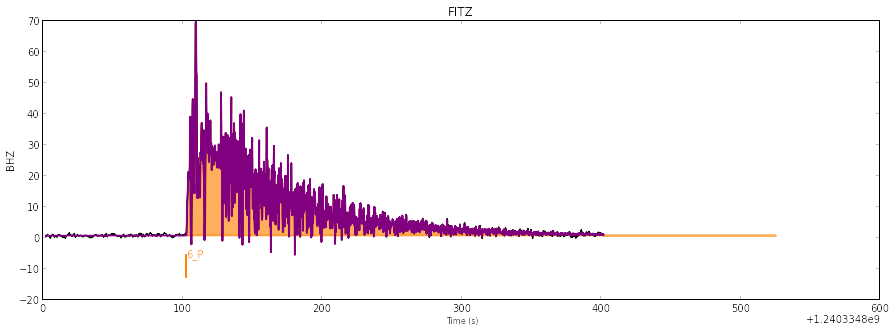

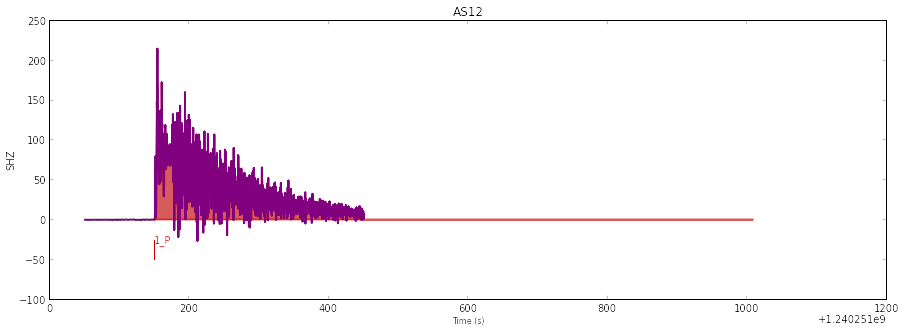

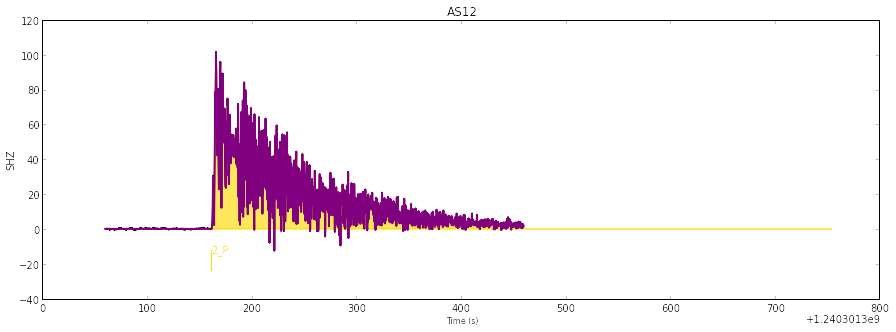

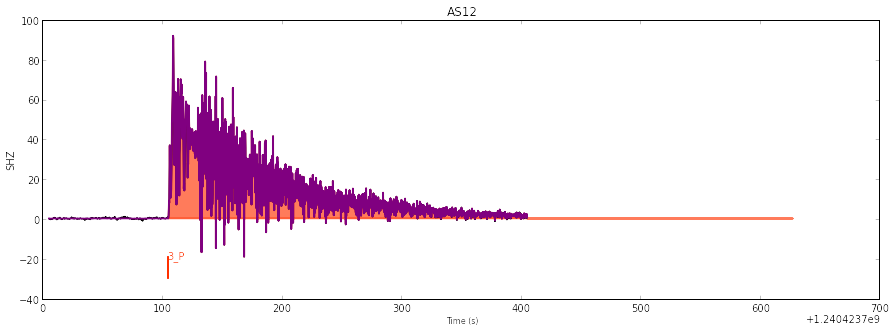

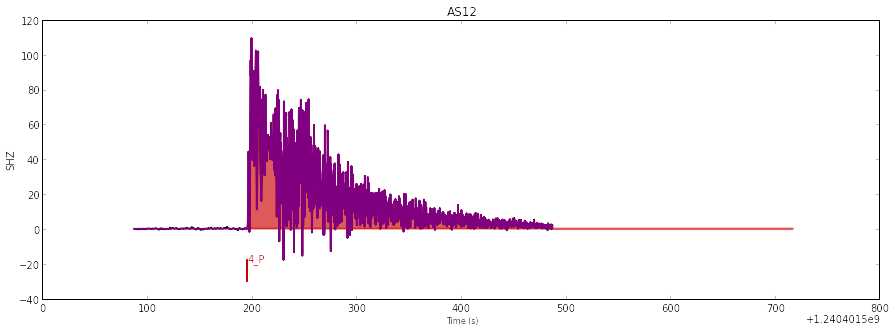

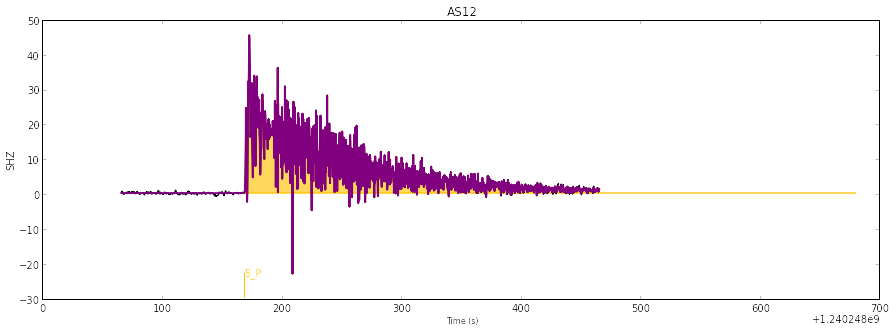

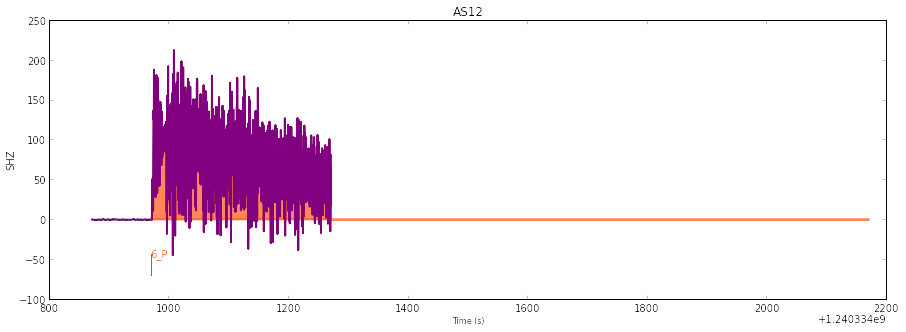

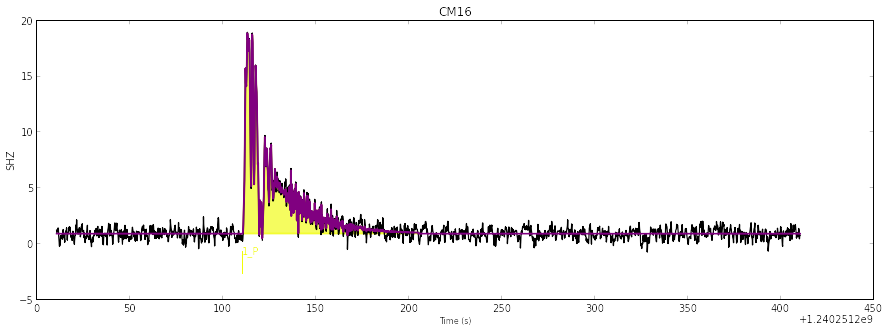

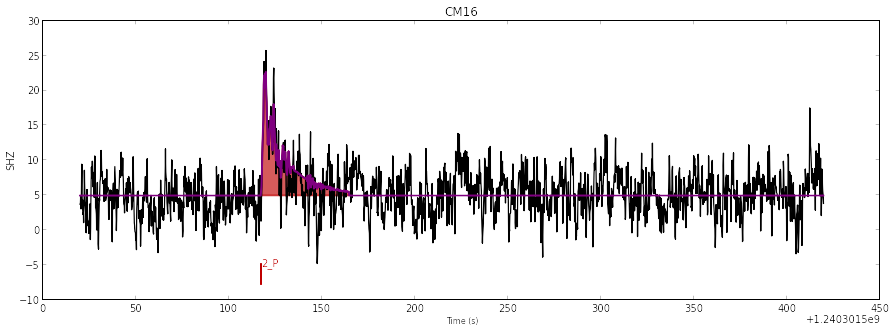

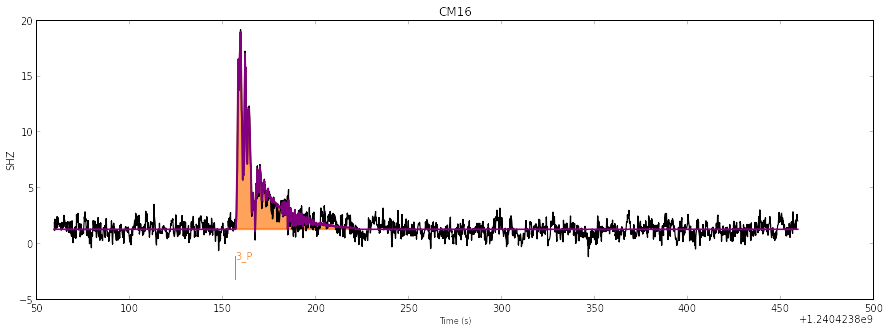

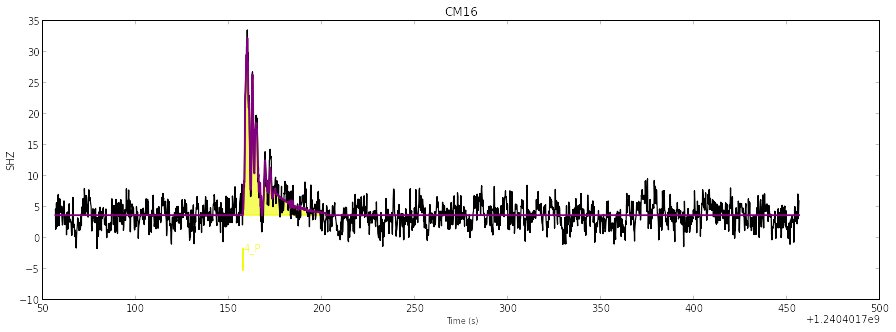

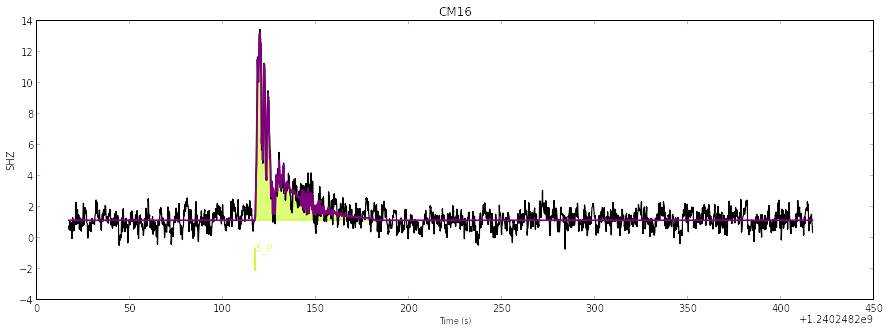

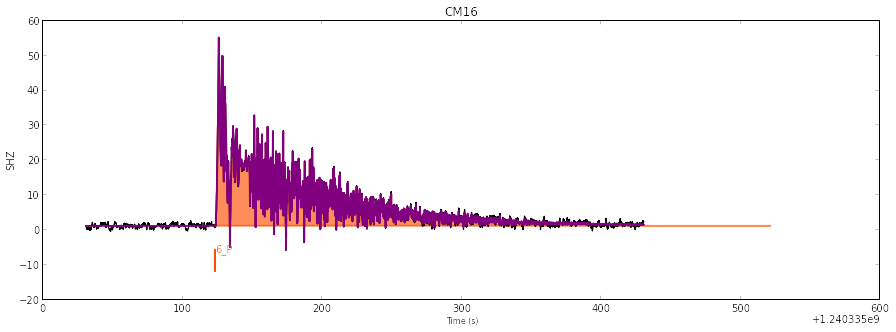

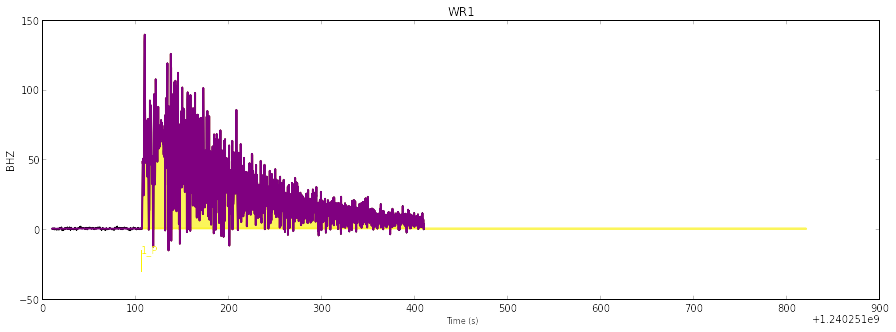

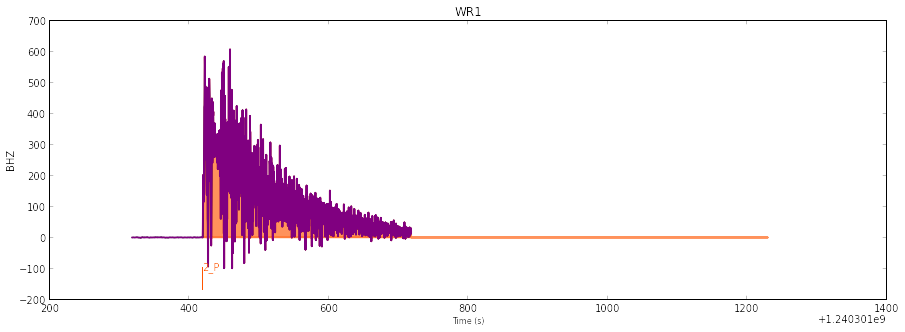

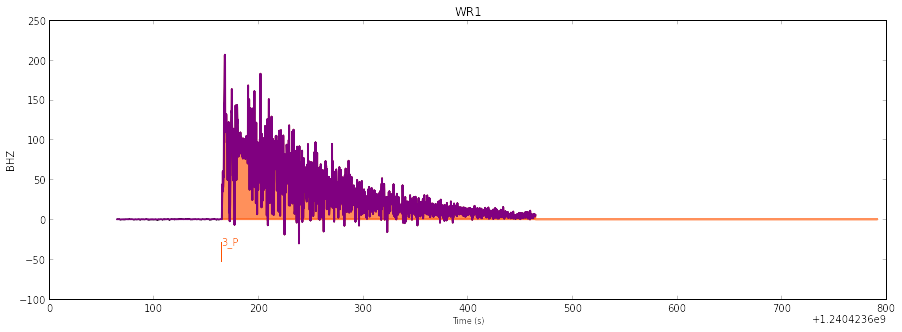

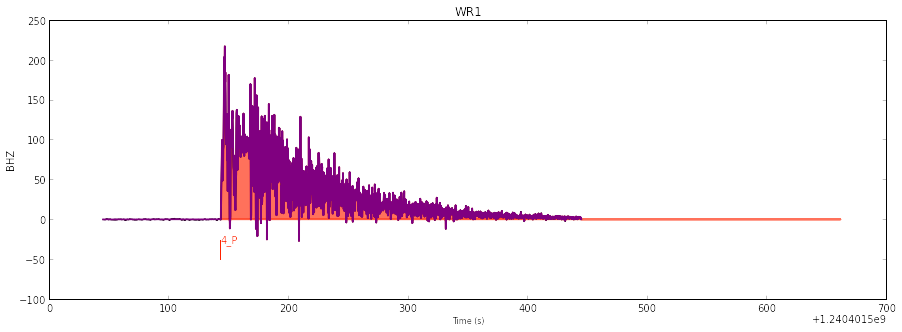

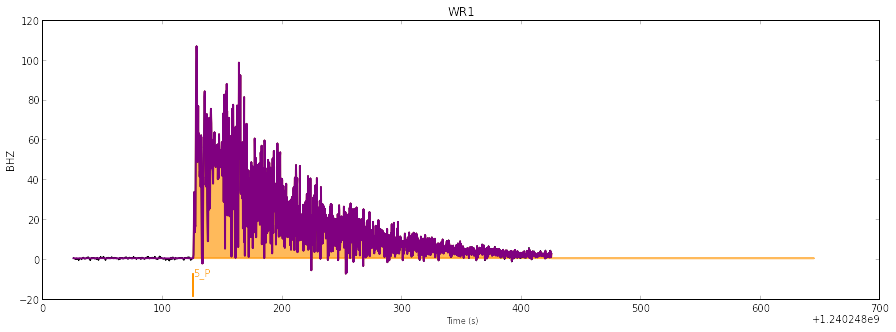

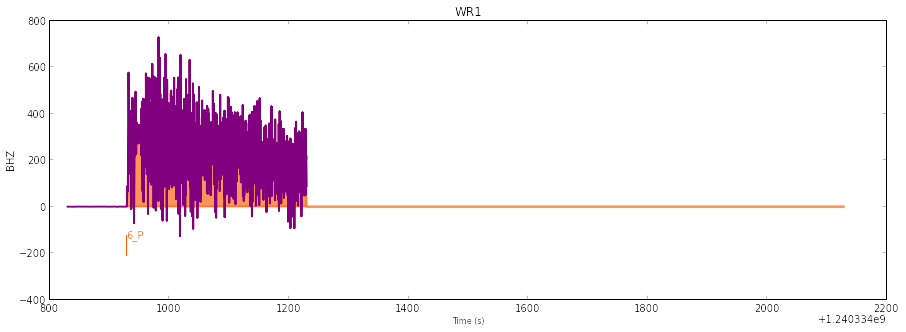

In [6]:
from sigvisa.plotting.plot import plot_with_fit, plot_with_fit_shapes, plot_pred_atimes

def do_plot(wn, ax=None):
    if ax is None:
      f = plt.figure(figsize=(15,5))
      ax=f.add_subplot(111)
    shape_colors = plot_with_fit_shapes(fname=None, wn=wn, axes=ax, plot_wave=True)
    atimes = dict([("%d_%s" % (eid, phase), wn.get_template_params_for_arrival(eid=eid, phase=phase)[0]['arrival_time']) for (eid, phase) in wn.arrivals()])
    colors = dict([("%d_%s" % (eid, phase), shape_colors[eid]) for (eid, phase) in wn.arrivals()])
    plot_pred_atimes(dict(atimes), wn.get_wave(), axes=ax, color=colors, alpha=1.0, bottom_rel=-0.1, top_rel=0.0)
    return ax

for sta in sg.station_waves.keys():
    for wn in sg.station_waves[sta]:
        ax = do_plot(wn)
        ax.set_title(sta)

In [31]:
"""
Now let's try to locate the doublet.
First we could imagine a pure-template model with no repeatable wiggles. (but we do need to account for wiggle variance.)
How to create my own models?
It's easy to train GPs for each coef and param at each station.
Can I force the model to use them?
  - I think I'd need to overwrite "get_param_model_id" in SigvisaGraph. My non-DB models could have negative ids.
  - but then I also need to replace or augment load_modelid from train_param_common. 
  
Alternately I could write these to the DB in some way that they *do* have modelids, but would never be loaded by a naive SQL search. 
"""
from sigvisa.models.spatial_regression.SparseGP import SparseGP

trainX = X[:n_evs, :].copy()
train_gps = dict()
models = []
modelid = 0
for sta in stas:
    train_gps[sta] = dict()
    for param in tm_params[sta].keys():
        y = tm_params[sta][param][:n_evs]
        mean = param_means[sta][param]
        gp = SparseGP(trainX, y, noise_var=param_noise_var, cov_main=gpcov, ymean=mean, sta=sta)        
        train_gps[sta][param] = -modelid
        models.append(gp)
        modelid += 1
        
    for i in range(true_coefs[sta].shape[1]):
        y = true_coefs[sta][:n_evs, i]
        gp = SparseGP(trainX, y, noise_var=coef_noise_var, cov_main=gpcov, sta=sta)
        train_gps[sta][i] = -modelid
        models.append(gp)
        modelid += 1
#print 
#print true_coefs[sta]
#print tm_params[sta]

In [32]:
def get_param_model_id_shim(runids, sta, phase, model_type, param, template_shape, chan=None, band=None):
    if param.startswith("db4"):
        param_num = int(param.split("_")[-1])
        return train_gps[sta][param_num]
    return train_gps[sta][param]
    
def load_modelid_shim(modelid, **kwargs):
    return models[-modelid]

In [33]:
print models[-train_gps["CM16"]['amp_transfer']].predict(ev_doublet)
print models[-train_gps["CM16"]['amp_transfer']].variance(ev_doublet)
print tm_params["CM16"]['amp_transfer'][n_evs]

3.37329633641
[ 0.11335767]
3.30737002596


In [5]:
def visualize(wn, variance=False):
    wn._parent_values()
    N=1000
    plt.figure(figsize=(10,5))
    v = wn.get_value()
    plot(v.data[:N], color="black", lw=1)
    #for i in range(5):
        #wn.parent_sample()
    #    plot(wn.get_value().data)
    mobs=wn.tssm.mean_obs(1000)
    vobs=wn.tssm.obs_var(1000)
    plot(mobs, c="green", lw=2, label="predicted")
    if variance:
        plot(mobs+2*np.sqrt(vobs), c="red", label="2 stddev")
        plot(mobs-2*np.sqrt(vobs), c="red")
    print wn.log_p()
    legend()

evid None, loc 129.51 E 4.08 S, depth 5.3km, time 1240246022.9, mb 4.5, natural source
evid None, loc 129.42 E 4.13 S, depth 0.0km, time 1240246022.5, mb 4.4, natural source
386.355294474
853.686774057
-356.376271492
1119.90700343
-2528.80808815


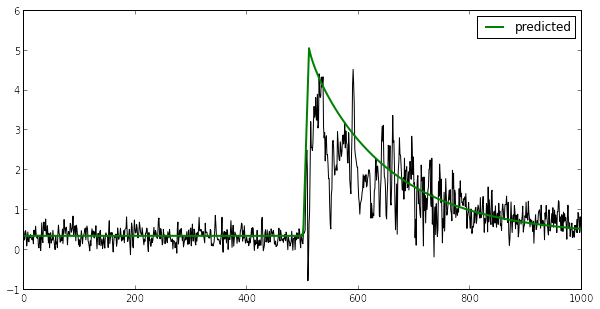

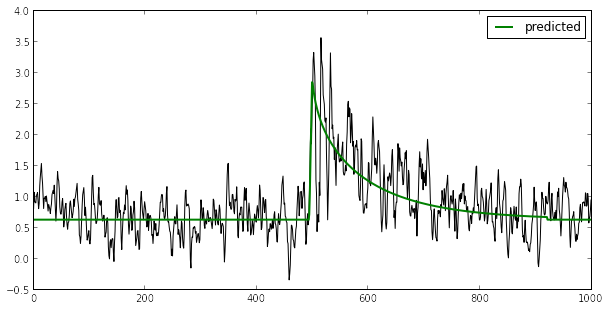

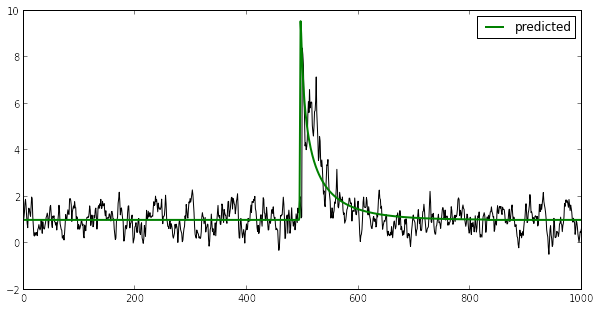

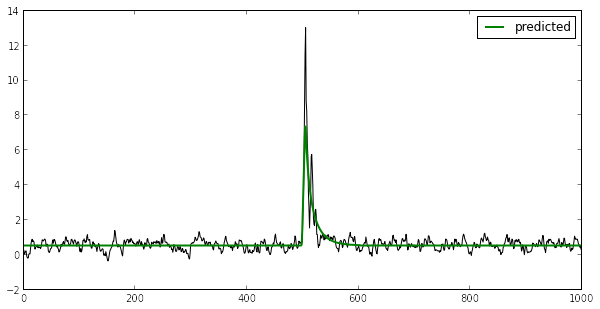

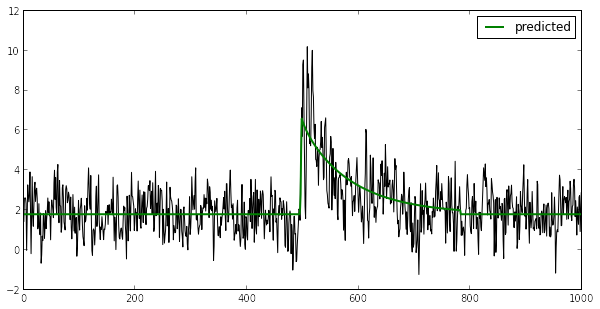

In [8]:
inferred_ev = sg.get_event(1)
print inferred_ev
print sw.ev_doublet
#print ev_doublet_base
#print ev_doublet_init

for wn in wns.values():
    visualize(wn)